In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)

In [4]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_test = pd.read_csv('../data/cases_2021_test.csv')
location = pd.read_csv('../data/location_2021.csv')

In [5]:
location


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2021-04-01 04:27:05,33.93911,67.709953,56454,2484,51550.0,2420.0,Afghanistan,145.020308,4.400043
1,NaN,Albania,2021-04-01 04:27:05,41.15330,20.168300,125157,2235,91271.0,31651.0,Albania,4349.051359,1.785757
2,NaN,Algeria,2021-04-01 04:27:05,28.03390,1.659600,117192,3093,81538.0,32561.0,Algeria,267.250200,2.639259
3,NaN,Andorra,2021-04-01 04:27:05,42.50630,1.521800,12010,115,11315.0,580.0,Andorra,15543.907332,0.957535
4,NaN,Angola,2021-04-01 04:27:05,-11.20270,17.873900,22311,537,20493.0,1281.0,Angola,67.884191,2.406884
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,W.P. Kuala Lumpur,Malaysia,2021-04-01 04:27:05,3.13900,101.686900,37819,118,36631.0,1070.0,"W.P. Kuala Lumpur, Malaysia",2126.574449,0.312012
4000,W.P. Labuan,Malaysia,2021-04-01 04:27:05,5.28310,115.230800,2327,12,2282.0,33.0,"W.P. Labuan, Malaysia",2341.046278,0.515685
4001,W.P. Putrajaya,Malaysia,2021-04-01 04:27:05,2.92640,101.696400,1142,8,1102.0,32.0,"W.P. Putrajaya, Malaysia",1083.491461,0.700525
4002,Unknown,Malaysia,2021-04-01 04:27:05,NaN,NaN,0,0,0.0,0.0,"Unknown, Malaysia",NaN,NaN


In [9]:
cases_train

,Unnamed: 0,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...
205841,205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,hospitalized
205842,205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,hospitalized
205843,205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,recovered
205844,205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,hospitalized


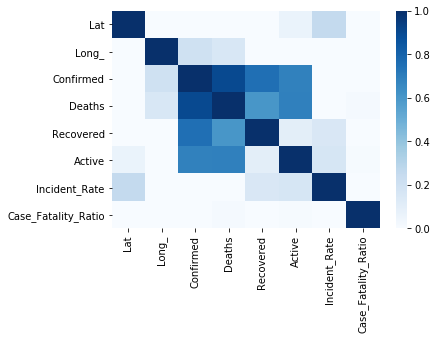

In [5]:
ax = sns.heatmap(location.corr(),vmin=0,vmax=1,cmap='Blues')
plt.show()

In [12]:
train_deathR = location[['Country_Region','Case_Fatality_Ratio']]

In [13]:
train_deathR = train_deathR.groupby('Country_Region').mean()

In [16]:
train_deathR

,Case_Fatality_Ratio
Country_Region,
Afghanistan,4.400043
Albania,1.785757
Algeria,2.639259
Andorra,0.957535
Angola,2.406884
Antigua and Barbuda,2.464789
Argentina,2.378129
Armenia,1.824656
Australia,1.873340


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96BB985C8>]],
      dtype=object)

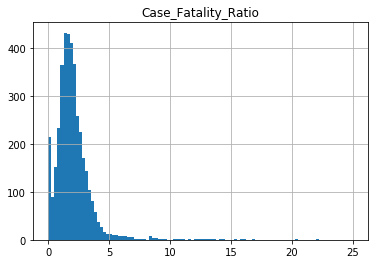

In [27]:
location.hist('Case_Fatality_Ratio',bins = 100,range=[0,25])

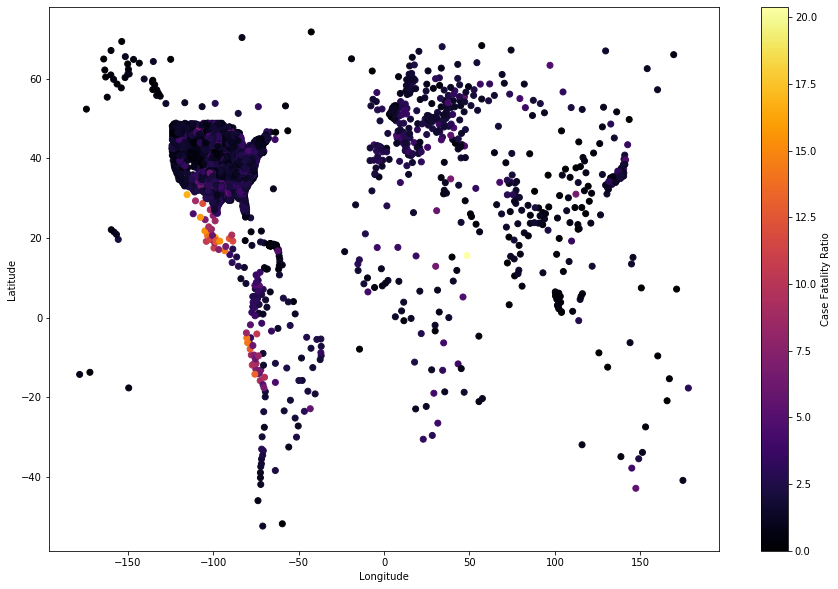

In [88]:

plt.figure(figsize=(15,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Case_Fatality_Ratio'],cmap='inferno')
cbar = plt.colorbar()
cbar.set_label('Case Fatality Ratio')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
location.isna().sum()